Question 1: Generate operatint points and plot them on an ROC.

In [1]:
# Probability of detecting fake news
# Evaluate probability of detection vs probability of false alarm through selecting classifier model w/ hyperparameter values
# Produce an ROC plot presenting operating points of various classifiers and their varying hyperparameters


import pandas as pd

In [2]:
true=pd.read_csv('disinformation_True.csv')
fake=pd.read_csv('disinformation_Fake.csv')

true.head()
true['Class']=1
fake['Class']=0

df=pd.concat([true,fake],axis=0)
df.head()


,title,text,subject,date,Class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [3]:
fake.head()

,title,text,subject,date,Class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = TfidfVectorizer(stop_words='english',
max_features=50).fit_transform(df['title'])

In [5]:
print(X)

  (0, 36)	1.0
  (2, 35)	1.0
  (3, 37)	0.6482942121424186
  (3, 16)	0.7613899227745539
  (4, 44)	1.0
  (5, 21)	0.6933266637505585
  (5, 49)	0.7206234365690031
  (6, 39)	0.5785952075683282
  (6, 44)	0.34961560922819407
  (6, 37)	0.7368829700589924
  (7, 44)	1.0
  (8, 44)	1.0
  (9, 9)	1.0
  (10, 40)	1.0
  (11, 43)	0.7695333033187948
  (11, 27)	0.6386066826171364
  (12, 8)	0.6825935551863762
  (12, 20)	0.644292307845383
  (12, 44)	0.34489630393684084
  (13, 42)	0.780052010944577
  (13, 44)	0.6257146795635544
  (14, 43)	0.6790327879359447
  (14, 27)	0.563503716111942
  (14, 39)	0.47050827286666314
  (15, 14)	1.0
  :	:
  (44859, 13)	0.9165483435730883
  (44859, 44)	0.3999239101296993
  (44860, 16)	1.0
  (44862, 10)	1.0
  (44864, 39)	1.0
  (44865, 16)	1.0
  (44867, 33)	1.0
  (44870, 25)	1.0
  (44871, 47)	1.0
  (44876, 46)	0.45207484862483555
  (44876, 16)	0.8919800060768358
  (44877, 25)	1.0
  (44878, 19)	1.0
  (44880, 39)	1.0
  (44882, 42)	1.0
  (44883, 27)	1.0
  (44884, 39)	1.0
  (44888, 22

In [6]:
y=df['Class']
y=y.values
print(type(y))

<class 'numpy.ndarray'>


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sanity Check
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions
predictions = rf_classifier.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8261692650334076


In [8]:
# TPR and FPR
FPR, TPR = [], []
TPR += [tp/(tp+fn)]  # Pd
FPR += [fp/(fp+tn)]  # Pf

print(f'Accuracy: {accuracy}, TPR: {TPR[-1]:6.3f}, FPR:  {FPR[-1]:6.3f}')


Accuracy: 0.8261692650334076, TPR:  0.932, FPR:   0.272


In [9]:
len(y)

44898

In [10]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score  # f1_score can be used too


# Cross Validation Sanity Check

# 10-fold cross validation
Accuracies = []
kfold = KFold(n_splits=10,shuffle=True)
for train_index, test_index in kfold.split(X,y):

    X_train=X[train_index]
    X_test=X[test_index]
    y_train=y[train_index]
    y_test=y[test_index]

    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Making predictions
    predictions = rf_classifier.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

    # Evaluating the model
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    Accuracies += [accuracy]

     # TPR and FPR
    FPR, TPR = [], []
    TPR += [tp/(tp+fn)]  # Pd
    FPR += [fp/(fp+tn)]  # Pf

print(f'10-fold cross validation accuracy is {np.mean(Accuracies):.3f}')

Accuracy: 0.8140311804008908
Accuracy: 0.833184855233853
Accuracy: 0.8198218262806236
Accuracy: 0.8135857461024499
Accuracy: 0.812249443207127
Accuracy: 0.82271714922049
Accuracy: 0.820489977728285
Accuracy: 0.8131403118040089
Accuracy: 0.819781688572065
Accuracy: 0.819781688572065
10-fold cross validation accuracy is 0.819


In [11]:
tprmean=np.mean([TPR])
fprmean=np.mean([FPR])
print(tprmean,fprmean)

0.9328671328671329 0.2837030716723549


In [12]:
'''from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Parameter to vary for Logistic Regression
estimators = list(range(10, 300,30))

# Let's vary C and generate training/testing sessions to collect data for ROC
print('Test Acc', 'Number of Estimators', 'TPR','FPR')
FPR, TPR = [], []
for estimator in estimators:
  pipe_lr = make_pipeline(StandardScaler(with_mean=False),
                          RandomForestClassifier(random_state=42,
                                                  n_estimators=estimator))
  kfold = KFold(n_splits=10,shuffle=True)
  tpr_avg=0
  fpr_avg=0
  acc_avg=0
  for train_index, test_index in kfold.split(X,y):

    X_train=X[train_index]
    X_test=X[test_index]
    y_train=y[train_index]
    y_test=y[test_index]

    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    accuracy=pipe_lr.score(X_test, y_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    tpr_avg+=tpr
    fpr_avg+=fpr
    acc_avg+=accuracy
  tpr_avg=tpr_avg/10
  fpr_avg=fpr_avg/10
  TPR.append(tpr_avg)
  FPR.append(fpr_avg)
  accuracy=acc_avg/10
  print(f'Accuracy: {accuracy}',f'Number of estimators: {estimator}',f'TPR: {TPR[-1]}',f'FPR: {FPR[-1]}')



'''








"from sklearn.pipeline import make_pipeline\nfrom sklearn.preprocessing import StandardScaler\n# Parameter to vary for Logistic Regression\nestimators = list(range(10, 300,30))\n\n# Let's vary C and generate training/testing sessions to collect data for ROC\nprint('Test Acc', 'Number of Estimators', 'TPR','FPR')\nFPR, TPR = [], []\nfor estimator in estimators:\n  pipe_lr = make_pipeline(StandardScaler(with_mean=False),\n                          RandomForestClassifier(random_state=42,\n                                                  n_estimators=estimator))\n  kfold = KFold(n_splits=10,shuffle=True)\n  tpr_avg=0\n  fpr_avg=0\n  acc_avg=0\n  for train_index, test_index in kfold.split(X,y):\n\n    X_train=X[train_index]\n    X_test=X[test_index]\n    y_train=y[train_index]\n    y_test=y[test_index]\n\n    pipe_lr.fit(X_train, y_train)\n    y_pred = pipe_lr.predict(X_test)\n    accuracy=pipe_lr.score(X_test, y_test)\n    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()\n    tpr

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Parameter to vary for Logistic Regression
num_features = list(range(3, 20,5))

# Let's vary C and generate training/testing sessions to collect data for ROC
print('Test Acc', 'Number of Features', 'TPR','FPR')
FPRrf1, TPRrf1= [], []
for num in num_features:
  pipe_lr = RandomForestClassifier(random_state=42,
                                                  n_estimators=100,
                                                 max_features=num)
  kfold = KFold(n_splits=10,shuffle=True)
  tpr_avg=0
  fpr_avg=0
  acc_avg=0
  for train_index, test_index in kfold.split(X,y):

    X_train=X[train_index]
    X_test=X[test_index]
    y_train=y[train_index]
    y_test=y[test_index]

    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    accuracy=pipe_lr.score(X_test, y_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    tpr_avg+=tpr
    fpr_avg+=fpr
    acc_avg+=accuracy
  tpr_avg=tpr_avg/10
  fpr_avg=fpr_avg/10
  TPRrf1.append(tpr_avg)
  FPRrf1.append(fpr_avg)
  accuracyrf1=acc_avg/10
  print(f'Accuracy: {accuracyrf1}',f'Number of Features: {num}',f'TPR: {TPRrf1[-1]}',f'FPR: {FPRrf1[-1]}')












Test Acc Number of Features TPR FPR
Accuracy: 0.8184999511302312 Number of Features: 3 TPR: 0.9325706535336418 FPR: 0.28557271175194343
Accuracy: 0.8186112749750565 Number of Features: 8 TPR: 0.9333988476198993 FPR: 0.2860688992020042
Accuracy: 0.8180318928576213 Number of Features: 13 TPR: 0.9325079866177797 FPR: 0.28630778859533
Accuracy: 0.8190786485747641 Number of Features: 18 TPR: 0.9337969211821614 FPR: 0.285508220046125


In [14]:
from sklearn.tree import DecisionTreeClassifier
# Parameter to vary for Decision Tree Classifier
depth = list(range(3, 23))

# Let's vary C and generate training/testing sessions to collect data for ROC
print('Test Acc', 'Number of Features', 'TPR','FPR')
FPRdt1, TPRdt1= [], []
for item in depth:
  pipe_lr = DecisionTreeClassifier(random_state=42,
                                                 max_depth=item)
  kfold = KFold(n_splits=10,shuffle=True)
  tpr_avg=0
  fpr_avg=0
  acc_avg=0
  for train_index, test_index in kfold.split(X,y):

    X_train=X[train_index]
    X_test=X[test_index]
    y_train=y[train_index]
    y_test=y[test_index]

    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    accuracy=pipe_lr.score(X_test, y_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    tpr_avg+=tpr
    fpr_avg+=fpr
    acc_avg+=accuracy
  tpr_avg=tpr_avg/10
  fpr_avg=fpr_avg/10
  TPRdt1.append(tpr_avg)
  FPRdt1.append(fpr_avg)
  accuracydt1=acc_avg/10
  print(f'Accuracy: {accuracydt1}',f'Max Depth: {item}',f'TPR: {TPRdt1[-1]}',f'FPR: {FPRdt1[-1]}')












Test Acc Number of Features TPR FPR
Accuracy: 0.7137511739907648 Max Depth: 3 TPR: 0.9950930839093133 FPR: 0.542828193586688
Accuracy: 0.7318588621232499 Max Depth: 4 TPR: 0.9939285666036553 FPR: 0.5071605316995544
Accuracy: 0.7319037478895454 Max Depth: 5 TPR: 0.9940779254101099 FPR: 0.5071246170312305
Accuracy: 0.7488528900886651 Max Depth: 6 TPR: 0.9678661235362407 FPR: 0.45093344820818054
Accuracy: 0.7591651307005842 Max Depth: 7 TPR: 0.9717722378180355 FPR: 0.4347156505801342
Accuracy: 0.7681857805345509 Max Depth: 8 TPR: 0.9728713767544079 FPR: 0.4184885654582732
Accuracy: 0.7756468397632222 Max Depth: 9 TPR: 0.9719441231998557 FPR: 0.4034356782324234
Accuracy: 0.7817945177546103 Max Depth: 10 TPR: 0.9696552969321509 FPR: 0.38950333265651305
Accuracy: 0.787028549371614 Max Depth: 11 TPR: 0.9687851265521514 FPR: 0.37868446808303713
Accuracy: 0.79237356745839 Max Depth: 12 TPR: 0.9680609891097435 FPR: 0.36788197213765955
Accuracy: 0.7977862093977807 Max Depth: 13 TPR: 0.96372632852

In [15]:
from sklearn.tree import DecisionTreeClassifier
# Parameter to vary for Decision Tree Classifier
depth=list(range(3,23))

# Let's vary C and generate training/testing sessions to collect data for ROC
print('Test Acc', 'Number of Features', 'TPR','FPR')
FPRdt2, TPRdt2= [], []
for item in depth:
  pipe_lr = DecisionTreeClassifier(criterion='entropy', max_depth=item,random_state=42)
  kfold = KFold(n_splits=10,shuffle=True)
  tpr_avg=0
  fpr_avg=0
  acc_avg=0
  for train_index, test_index in kfold.split(X,y):

    X_train=X[train_index]
    X_test=X[test_index]
    y_train=y[train_index]
    y_test=y[test_index]

    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    accuracy=pipe_lr.score(X_test, y_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    tpr_avg+=tpr
    fpr_avg+=fpr
    acc_avg+=accuracy
  tpr_avg=tpr_avg/10
  fpr_avg=fpr_avg/10
  TPRdt2.append(tpr_avg)
  FPRdt2.append(fpr_avg)
  accuracydt2=acc_avg/10
  print(f'Accuracy Using Entropy: {accuracydt2}',f'Depth: {item}',f'TPR: {TPRdt2[-1]}',f'FPR: {FPRdt2[-1]}')












Test Acc Number of Features TPR FPR
Accuracy Using Entropy: 0.7137732571725688 Depth: 3 TPR: 0.9951002573116131 FPR: 0.5428390033940856
Accuracy Using Entropy: 0.7137957223820068 Depth: 4 TPR: 0.9951899792614982 FPR: 0.5429020197606971
Accuracy Using Entropy: 0.731992472567191 Depth: 5 TPR: 0.9943517174116778 FPR: 0.5072773593752504
Accuracy Using Entropy: 0.7429732168860184 Depth: 6 TPR: 0.9940403731207826 FPR: 0.4860354760214903
Accuracy Using Entropy: 0.7526167801421043 Depth: 7 TPR: 0.9820004361115273 FPR: 0.4564658045986665
Accuracy Using Entropy: 0.7677181737491446 Depth: 8 TPR: 0.9697396908834455 FPR: 0.4165091775653075
Accuracy Using Entropy: 0.7757805543965178 Depth: 9 TPR: 0.9716010544043373 FPR: 0.402809748737975
Accuracy Using Entropy: 0.7820836680209629 Depth: 10 TPR: 0.9699613553313359 FPR: 0.3893096579820546
Accuracy Using Entropy: 0.7869615357709343 Depth: 11 TPR: 0.9686092858431726 FPR: 0.3786623847393754
Accuracy Using Entropy: 0.7921957459982604 Depth: 12 TPR: 0.9668

In [16]:
from sklearn.tree import DecisionTreeClassifier
# Parameter to vary for Decision Tree Classifier
depth=list(range(3,30))

# Let's vary C and generate training/testing sessions to collect data for ROC
print('Test Acc', 'Number of Features', 'TPR','FPR')
FPRdt3, TPRdt3= [], []
for item in depth:
  pipe_lr = DecisionTreeClassifier(criterion='log_loss', max_depth=item,random_state=42)
  kfold = KFold(n_splits=10,shuffle=True)
  tpr_avg=0
  fpr_avg=0
  acc_avg=0
  for train_index, test_index in kfold.split(X,y):

    X_train=X[train_index]
    X_test=X[test_index]
    y_train=y[train_index]
    y_test=y[test_index]

    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    accuracy=pipe_lr.score(X_test, y_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    tpr_avg+=tpr
    fpr_avg+=fpr
    acc_avg+=accuracy
  tpr_avg=tpr_avg/10
  fpr_avg=fpr_avg/10
  TPRdt3.append(tpr_avg)
  FPRdt3.append(fpr_avg)
  accuracydt3=acc_avg/10
  print(f'Accuracy Using Log Loss: {accuracydt3}',f'Depth: {item}',f'TPR: {TPRdt3[-1]}',f'FPR: {FPRdt3[-1]}')












Test Acc Number of Features TPR FPR
Accuracy Using Log Loss: 0.7137731926743969 Depth: 3 TPR: 0.9951047989179391 FPR: 0.5429058950723223
Accuracy Using Log Loss: 0.7138403997695927 Depth: 4 TPR: 0.9952881100507505 FPR: 0.5428770167562289
Accuracy Using Log Loss: 0.7320150518887794 Depth: 5 TPR: 0.9943057768369993 FPR: 0.5071674728268005
Accuracy Using Log Loss: 0.7428172454219941 Depth: 6 TPR: 0.9938876005942234 FPR: 0.4861730407655803
Accuracy Using Log Loss: 0.7554234577866906 Depth: 7 TPR: 0.9745600758596284 FPR: 0.44446773787806315
Accuracy Using Log Loss: 0.7678515956599676 Depth: 8 TPR: 0.9705583832366736 FPR: 0.41703231138794267
Accuracy Using Log Loss: 0.7757585257900903 Depth: 9 TPR: 0.9714352436533312 FPR: 0.4027090910586174
Accuracy Using Log Loss: 0.7817940910743957 Depth: 10 TPR: 0.9695426061520713 FPR: 0.38948892404973
Accuracy Using Log Loss: 0.7870059452430366 Depth: 11 TPR: 0.9683035696523883 FPR: 0.37830004405741163
Accuracy Using Log Loss: 0.7924406108274571 Depth: 1

In [17]:
'''from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Parameter to vary for Logistic Regression
estimators = list(range(10, 300,30))

# Let's vary C and generate training/testing sessions to collect data for ROC
print('Test Acc', 'Number of Estimators', 'TPR','FPR')
FPR, TPR = [], []
for estimator in estimators:
  pipe_lr = make_pipeline(StandardScaler(with_mean=False),
                          RandomForestClassifier(random_state=42,
                                                  n_estimators=estimator))
  kfold = KFold(n_splits=10,shuffle=True)
  tpr_avg=0
  fpr_avg=0
  acc_avg=0
  for train_index, test_index in kfold.split(X,y):

    X_train=X[train_index]
    X_test=X[test_index]
    y_train=y[train_index]
    y_test=y[test_index]

    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    accuracy=pipe_lr.score(X_test, y_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    tpr_avg+=tpr
    fpr_avg+=fpr
    acc_avg+=accuracy
  tpr_avg=tpr_avg/10
  fpr_avg=fpr_avg/10
  TPR.append(tpr_avg)
  FPR.append(fpr_avg)
  accuracy=acc_avg/10
  print(f'Accuracy: {accuracy}',f'Number of estimators: {estimator}',f'TPR: {TPR[-1]}',f'FPR: {FPR[-1]}')



'''








"from sklearn.pipeline import make_pipeline\nfrom sklearn.preprocessing import StandardScaler\n# Parameter to vary for Logistic Regression\nestimators = list(range(10, 300,30))\n\n# Let's vary C and generate training/testing sessions to collect data for ROC\nprint('Test Acc', 'Number of Estimators', 'TPR','FPR')\nFPR, TPR = [], []\nfor estimator in estimators:\n  pipe_lr = make_pipeline(StandardScaler(with_mean=False),\n                          RandomForestClassifier(random_state=42,\n                                                  n_estimators=estimator))\n  kfold = KFold(n_splits=10,shuffle=True)\n  tpr_avg=0\n  fpr_avg=0\n  acc_avg=0\n  for train_index, test_index in kfold.split(X,y):\n\n    X_train=X[train_index]\n    X_test=X[test_index]\n    y_train=y[train_index]\n    y_test=y[test_index]\n\n    pipe_lr.fit(X_train, y_train)\n    y_pred = pipe_lr.predict(X_test)\n    accuracy=pipe_lr.score(X_test, y_test)\n    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()\n    tpr

Varying Activation Function for Multi Layer Perceptron

In [18]:
from sklearn.neural_network import MLPClassifier
# Parameter to vary for Decision Tree Classifier
activation=['identity', 'logistic','relu']

# Let's vary C and generate training/testing sessions to collect data for ROC
print('Test Acc', 'Number of Features', 'TPR','FPR')
FPRnn1, TPRnn1= [], []
for item in activation:
  pipe_lr = MLPClassifier(random_state=42,activation=item)
  kfold = KFold(n_splits=10,shuffle=True)
  tpr_avg=0
  fpr_avg=0
  acc_avg=0
  for train_index, test_index in kfold.split(X,y):

    X_train=X[train_index]
    X_test=X[test_index]
    y_train=y[train_index]
    y_test=y[test_index]

    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    accuracy=pipe_lr.score(X_test, y_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    tpr_avg+=tpr
    fpr_avg+=fpr
    acc_avg+=accuracy
  tpr_avg=tpr_avg/10
  fpr_avg=fpr_avg/10
  TPRnn1.append(tpr_avg)
  FPRnn1.append(fpr_avg)
  accuracynn1=acc_avg/10
  print(f'Accuracy: {accuracynn1}',f'Activation Function: {item}',f'TPR: {TPRnn1[-1]}',f'FPR: {FPRnn1[-1]}')












Test Acc Number of Features TPR FPR
Accuracy: 0.8116620137023887 Activation Function: identity TPR: 0.939274453657289 FPR: 0.3046953783818639
Accuracy: 0.812040707277031 Activation Function: logistic TPR: 0.9359074125689724 FPR: 0.300971080956641


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8161834050172632 Activation Function: relu TPR: 0.9331649473721454 FPR: 0.29044089608057966


Varying Learning Rate of Multi Layer Perceptron

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score  # f1_score can be used too
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
# Parameter to vary for Decision Tree Classifier
lr=[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,0.6,0.7,0.8,0.9]

# Let's vary C and generate training/testing sessions to collect data for ROC
print('Test Acc', 'Number of Features', 'TPR','FPR')
FPRnn3, TPRnn3= [], []
for item in lr:
  pipe_lr = MLPClassifier(random_state=42,learning_rate_init=item)
  kfold = KFold(n_splits=10,shuffle=True)
  tpr_avg=0
  fpr_avg=0
  acc_avg=0
  for train_index, test_index in kfold.split(X,y):

    X_train=X[train_index]
    X_test=X[test_index]
    y_train=y[train_index]
    y_test=y[test_index]

    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    accuracy=pipe_lr.score(X_test, y_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    tpr_avg+=tpr
    fpr_avg+=fpr
    acc_avg+=accuracy
  tpr_avg=tpr_avg/10
  fpr_avg=fpr_avg/10
  TPRnn3.append(tpr_avg)
  FPRnn3.append(fpr_avg)
  accuracynn3=acc_avg/10
  print(f'Accuracy: {accuracynn3}',f'Learning Rate: {item}',f'TPR: {TPRnn3[-1]}',f'FPR: {FPRnn3[-1]}')












Test Acc Number of Features TPR FPR
Accuracy: 0.8164950998754194 Learning Rate: 0.0001 TPR: 0.9365594441508422 FPR: 0.29300628346918817


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Accuracy: 0.8165842909244623 Learning Rate: 0.0005 TPR: 0.9349625544286176 FPR: 0.29137862254936786


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8166956246920833 Learning Rate: 0.001 TPR: 0.9319207027379365 FPR: 0.2883826060683893


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.816005256104876 Learning Rate: 0.005 TPR: 0.9293162663428701 FPR: 0.28745461865114674
Accuracy: 0.8164503728738548 Learning Rate: 0.01 TPR: 0.9269203273240676 FPR: 0.28430281297689114
Accuracy: 0.815448294544298 Learning Rate: 0.05 TPR: 0.9296648173019 FPR: 0.28879014450976864
Accuracy: 0.8137779556163272 Learning Rate: 0.1 TPR: 0.9226821732858987 FPR: 0.285611648320145
Accuracy: 0.8075409873479392 Learning Rate: 0.5 TPR: 0.9310076414758847 FPR: 0.3049752371345445
Accuracy: 0.7774744847712374 Learning Rate: 0.6 TPR: 0.9548099932224264 FPR: 0.38497170897605404
Accuracy: 0.7630426020348677 Learning Rate: 0.7 TPR: 0.9658188788897814 FPR: 0.42318255742165045
Accuracy: 0.6270649958001767 Learning Rate: 0.8 TPR: 0.41583366693643653 FPR: 0.18597637065811368
Accuracy: 0.6027927658850316 Learning Rate: 0.9 TPR: 0.48443136123730823 FPR: 0.28798927006711816


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Parameter to vary for Decision Tree Classifier
max_depth=list(range(3,27,2))

# Let's vary C and generate training/testing sessions to collect data for ROC
print('Test Acc', 'Number of Features', 'TPR','FPR')
FPRrf2, TPRrf2= [], []
for item in max_depth:
  pipe_lr = RandomForestClassifier(random_state=42,max_depth=item)
  kfold = KFold(n_splits=10,shuffle=True)
  tpr_avg=0
  fpr_avg=0
  acc_avg=0
  for train_index, test_index in kfold.split(X,y):

    X_train=X[train_index]
    X_test=X[test_index]
    y_train=y[train_index]
    y_test=y[test_index]

    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    accuracy=pipe_lr.score(X_test, y_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    tpr_avg+=tpr
    fpr_avg+=fpr
    acc_avg+=accuracy
  tpr_avg=tpr_avg/10
  fpr_avg=fpr_avg/10
  TPRrf2.append(tpr_avg)
  FPRrf2.append(fpr_avg)
  accuracyrf2=acc_avg/10
  print(f'Accuracy: {accuracyrf2}',f'Activation Function: {item}',f'TPR: {TPRrf2[-1]}',f'FPR: {FPRrf2[-1]}')












Test Acc Number of Features TPR FPR
Accuracy: 0.7854468954301062 Activation Function: 3 TPR: 0.9646577164726841 FPR: 0.37794647165507794
Accuracy: 0.7892558399373673 Activation Function: 5 TPR: 0.9640159271150903 FPR: 0.37007266578502584
Accuracy: 0.7935988987681345 Activation Function: 7 TPR: 0.9640553726304697 FPR: 0.3619147263075522
Accuracy: 0.7988330048061059 Activation Function: 9 TPR: 0.9614860811573198 FPR: 0.3494726085718288
Accuracy: 0.8045346184015271 Activation Function: 11 TPR: 0.9612240724909172 FPR: 0.33834992037195766
Accuracy: 0.8048465613295752 Activation Function: 13 TPR: 0.9598960462603096 FPR: 0.33656096548449554
Accuracy: 0.806405730216054 Activation Function: 15 TPR: 0.9602955836630278 FPR: 0.33388819250496327
Accuracy: 0.8084326249614872 Activation Function: 17 TPR: 0.9583998531155657 FPR: 0.3282775760732108
Accuracy: 0.8104593559807916 Activation Function: 19 TPR: 0.9551094264675504 FPR: 0.3214372008080085
Accuracy: 0.8129316056423 Activation Function: 21 TPR: 

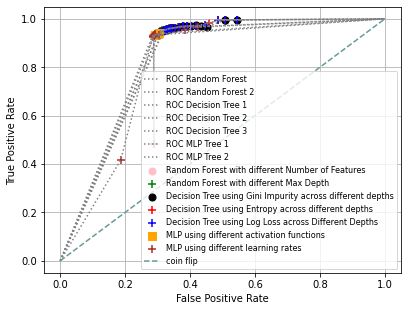

In [21]:
import matplotlib.pyplot as plt

# Sorts the points to display nicely on ROC
FPRrf1, TPRrf1 = zip(*sorted(zip(FPRrf1, TPRrf1)))
fprrf1 = [0.]+list(FPRrf1)+[1.]; tprrf1 = [0.]+list(TPRrf1)+[1.]
FPRrf2, TPRrf2 = zip(*sorted(zip(FPRrf2, TPRrf2)))
fprrf2 = [0.]+list(FPRrf2)+[1.]; tprrf2 = [0.]+list(TPRrf2)+[1.]
FPRdt1, TPRdt1 = zip(*sorted(zip(FPRdt1, TPRdt1)))
fprdt1 = [0.]+list(FPRdt1)+[1.]; tprdt1 = [0.]+list(TPRdt1)+[1.]
FPRdt2, TPRdt2 = zip(*sorted(zip(FPRdt2, TPRdt2)))
fprdt2 = [0.]+list(FPRdt2)+[1.]; tprdt2 = [0.]+list(TPRdt2)+[1.]
FPRdt3, TPRdt3 = zip(*sorted(zip(FPRdt3, TPRdt3)))
fprdt3 = [0.]+list(FPRdt3)+[1.]; tprdt3 = [0.]+list(TPRdt3)+[1.]
FPRnn1, TPRnn1 = zip(*sorted(zip(FPRnn1, TPRnn1)))
fprnn1 = [0.]+list(FPRnn1)+[1.]; tprnn1 = [0.]+list(TPRnn1)+[1.]
FPRnn1, TPRnn1 = zip(*sorted(zip(FPRnn1, TPRnn1)))
fprnn1 = [0.]+list(FPRnn1)+[1.]; tprnn1 = [0.]+list(TPRnn1)+[1.]
FPRnn3, TPRnn3 = zip(*sorted(zip(FPRnn3, TPRnn3)))
fprnn3 = [0.]+list(FPRnn3)+[1.]; tprnn3 = [0.]+list(TPRnn3)+[1.]
# Plot
fig, ax = plt.subplots(dpi=72)
plt.plot(fprrf1, tprrf1, ':',color='gray', label='ROC Random Forest ')
plt.plot(fprrf2, tprrf2, ':',color='gray', label='ROC Random Forest 2 ')
plt.plot(fprdt1, tprdt1, ':',color='gray', label='ROC Decision Tree 1')
plt.plot(fprdt2, tprdt2, ':',color='gray', label='ROC Decision Tree 2')
plt.plot(fprdt3, tprdt3, ':',color='gray', label='ROC Decision Tree 3')
plt.plot(fprnn1, tprnn1, ':',color='gray', label='ROC MLP Tree 1')
plt.plot(fprnn3, tprnn3, ':',color='gray', label='ROC MLP Tree 2')

plt.scatter(FPRrf1, TPRrf1, 50, color='pink', marker='o', label='Random Forest with different Number of Features')
plt.scatter(FPRrf2, TPRrf2, 50, color='green', marker='+', label='Random Forest with different Max Depth')
plt.scatter(FPRdt1, TPRdt1, 50, color='black', marker='o', label='Decision Tree using Gini Impurity across different depths')
plt.scatter(FPRdt2, TPRdt2, 50, color='red', marker='+', label='Decision Tree using Entropy across different depths')
plt.scatter(FPRdt3, TPRdt3, 50, color='blue', marker='+', label='Decision Tree using Log Loss across Different Depths')
plt.scatter(FPRnn1, TPRnn1, 50, color='orange', marker='s', label='MLP using different activation functions')
plt.scatter(FPRnn3, TPRnn3, 50, color='brown', marker='+', label='MLP using different learning rates')

plt.plot([0, 1], [0, 1], linestyle='--', color=(0.4, 0.6, 0.6), label='coin flip')


# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right',fontsize=8)
plt.grid()
plt.show()

**Question 2**: What kind of behavior would you expect to see in Pd-Pf interaction of an ROC plot? Do you see it in yours?

In models that have perfect classification, we tend to see the ROC plot reaching the top left of the corner, which represents a TPR, or Probability of detection of 1, and a probability of false alarm of 0, and the graph forms a right angle. In more realistic situations, we see an overlap between the probability distribution of detection and false alarms, which means that the curve gradually starts from the bottom left and eventually slopes into the top right Lastly, in completely random situations, where the classifier selects randomly, we can expect a 45 degree line in the middle of the graph, which signals an equal probability of detection and probability of false alarm, which is not ideal. Since the classifier is binary, this is saying that there is an equal probability of landing on either class, which makes it random.

Our experimentation showed consistenly that most models, when tuned with the correct hyperparameters, had an max accuracy of 81%. Since this is a reasonably high accuracy, we can expect the ROC curve to land somewhere between random and the perfect classification, which is what was shown in the curve. Interestingly, often times  certain hyperparameters were selected for TPR and FPR calculation and had little to no effect on the accuracy, as it stayed relatively the same. As a result, many of the points were clustered around 95% probability of detection of fake news and around 30% probability of false alarm.

**Question 3**: From the ROC plot that you created make a selection of the classifier and hyperparameter setting for this problem and then justify the selection. Note that we are classifying fake news so your conclusion might be subjective but has to be supported by your findings.

Answer: Although many of the curves on the ROC plot had similar characteristics, the classifier that I would select would be the DecisionTreeClassifier with a max_depth of 20 with a log_loss criterion. The reasoning behind this is due to the fact that the detection of fake news is highest, nearing 0.995 percent TPR. This being said, however, the FPR was around 0.45. As seen on the ROC graph, there are a string of data points from the logloss decision tree classifier that reach the highest TPR. Although it is tempting to choose the highest classifier, many come with a 50% false positive rate, or probaiblity of false alarm. If the probability of false alarm is around 50%, that is nearly random in terms of a correct vs an incorrect detection. For this reason, I selected the leftmost point that still has a high probabilty of detection. Because the classification is of fake news, we can assume that it is okay to tolerate a certain level of false positives/alarms, since the risk is much lower if a news article is incorrectly considered fake news. Similarly, the risk if much higher if articles are put out and do have fake news, which means that readers are misguided and duped. This is why I believe it is better to select a parameter/classifier with the highest true positive rate/probability of detection.

Question 4: Try adding text column to the features. Choose any classifier to train on this new and improved dataset and report its performance. Why do you think the performance is much higher than the previous one which only uses title column?

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
a = TfidfVectorizer(stop_words='english',
max_features=50).fit_transform(df['text'])

X_combined=hstack([X,a])
print(type(X_combined))

<class 'scipy.sparse._csr.csr_matrix'>


In [23]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Cross Validation Sanity Check

# 10-fold cross validation
Accuracies = []
kfold = KFold(n_splits=10,shuffle=True)
for train_index, test_index in kfold.split(X_combined,y):

    X_train=X[train_index]
    X_test=X[test_index]
    y_train=y[train_index]
    y_test=y[test_index]

    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Making predictions
    predictions = rf_classifier.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

    # Evaluating the model
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    Accuracies += [accuracy]

     # TPR and FPR
    FPR, TPR = [], []
    TPR += [tp/(tp+fn)]  # Pd
    FPR += [fp/(fp+tn)]  # Pf

print(f'10-fold cross validation accuracy is {np.mean(Accuracies):.3f}')

Accuracy: 0.8160356347438753
Accuracy: 0.8184855233853007
Accuracy: 0.8238307349665924
Accuracy: 0.8149220489977729
Accuracy: 0.8146993318485524
Accuracy: 0.812249443207127
Accuracy: 0.8280623608017817
Accuracy: 0.823162583518931
Accuracy: 0.8139897527288928
Accuracy: 0.8168857206504789
10-fold cross validation accuracy is 0.818


The TfidVectorizer takes the words and assigns frequency values to them based on a given text. As with any type of data, since the text column contains much more data than the title column, the data contains a larger amount of information that can be learned. In other words, the data is more generalizable and has a higher variance, rather than the title columns. When the data is more generalizable, there is less overfitting, resulting in a slightly higher accuracy. In this case, I only saw slightly higher performance results. It is possible that the text column did not provide as much generalizable information as thought, or that the Random Forest model chosen converged through similar means for both just the title column and the title and text column.